# Sukhbold 2015

## Abstract

*Nucleosynthesis, light curves, explosion energies, and remnant masses are calculated for a grid of supernovae resulting from massive stars with solar metallicity and masses from 9.0 to 120 solar masses. The full evolution is followed using an adaptive reaction network of up to 2000 nuclei. A novel aspect of the survey is the use of a one-dimensional neutrino transport model for the explosion. This explosion model has been calibrated to give the observed energy for SN 1987A, using several standard progenitors, and for the Crab supernova using a 9.6 solar mass progenitor. As a result of using a calibrated central engine, the final kinetic energy of the supernova is variable and sensitive to the structure of the presupernova star. Many progenitors with extended core structures do not explode, but become black holes, and the masses of exploding stars do not form a simply connected set. The resulting nucleosynthesis agrees reasonably well with the sun provided that a reasonable contribution from Type Ia supernovae is also allowed, but with a deficiency of light s-process isotopes. The resulting neutron star IMF has a mean gravitational mass near 1.4 solar masses. The average black hole mass is about 9 solar masses if only the helium core implodes, and 14 solar masses if the entire presupernova star collapses. Only ~10% of supernovae come from stars over 20 solar masses and some of these are Type Ib or Ic. Some useful systematics of Type IIp light curves are explored.*

### snewpy readme

CCSN neutrino models from the MPA Garching CCSN archive based on the paper by Sukhbold et al., 2015. The archive is available on
[their website](https://wwwmpa.mpa-garching.mpg.de/ccsnarchive/data/SEWBJ_2015/index.html), but the data are private and available only upon request.
Note these are the results using the PROMETHEUS-VERTEX code https://ui.adsabs.harvard.edu/abs/2002A%26A...396..361R/abstract. 
The four models are also described in Appendix C of this paper https://arxiv.org/abs/2010.04728

The citation is: *Core-Collapse Supernovae from 9 to 120 Solar Masses Based on Neutrino-powered Explosions*, Tuguldur Sukhbold, T. Ertl, S. E. Woosley, Justin M. Brown, H.-T. Janka, [Astrophys. J. 821 (2016)
38](http://dx.doi.org/10.3847/0004-637X/821/1/38), [arXiv:1510.04643](http://arxiv.org/abs/1510.04643).

In [1]:
from sspike import pnut, beer
from sspike.supernova import Supernova
from sspike.detectors import Detector

## Progenitor options

- `mass`: 9.6 or 27.0 S.M.
- `eos`: 'LS220' or 'SFHo'.
- `t_start`: -0.23338102, -0.24226689, -0.34945536, -0.29291019
- `t_end`: 11.999932,  13.622597, 15.439294, 11.168845

Time orders: 9L, 9S, 27L, 27S

In [2]:
model = 'Sukhbold_2015'
progenitor = {'mass': 27.0,
              'eos': 'SFHo'}
transformation = 'NoTransformation'
distance = 10.0

In [3]:
detector = Detector('kamland')
sn = Supernova(model, progenitor, transformation, distance)

/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


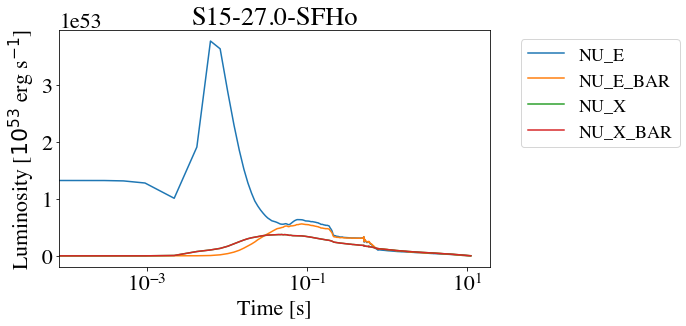

In [4]:
# lum = pnut.get_luminosities(sn)
beer.plot_luminosities(sn)

/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


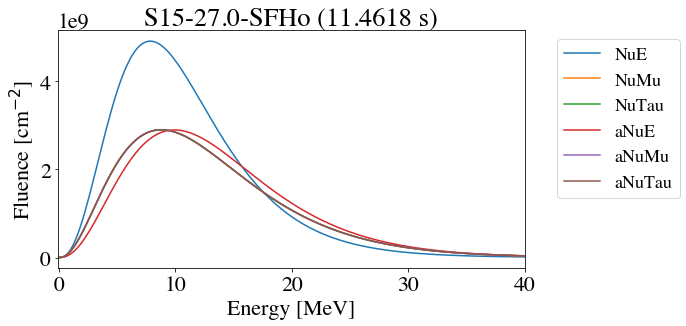

In [5]:
# fluences = pnut.get_fluences(sn)
beer.plot_fluences(sn)

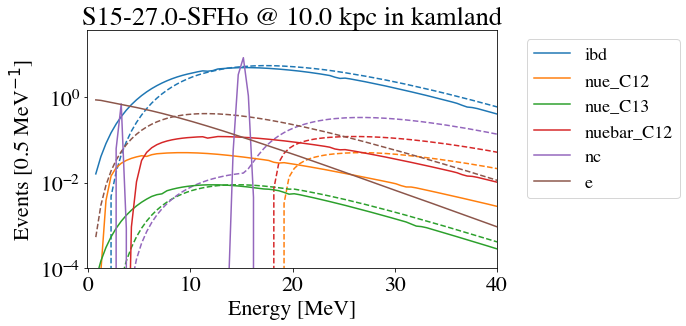

In [6]:
snow_events = pnut.snowglobes_events(sn, detector)
beer.plot_snowglobes_events(sn, detector)

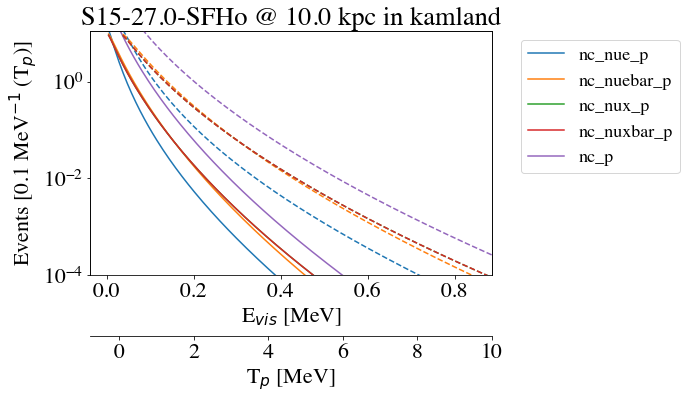

In [7]:
sspike_events = pnut.sspike_events(sn, detector)
beer.plot_sspike_events(sn, detector)

In [8]:
# totals = pnut.event_totals(sn, detector)
beer.bar_totals(sn, detector)

In [9]:
vis = pnut.vis_totals(sn, detector)
beer.bar_vis(sn, detector)

In [10]:
vis

,model,mass,eos,channel,events
0,Sukhbold_2015,27.0,SFHo,ibd,199.348079
1,Sukhbold_2015,27.0,SFHo,nue_C12,1.971845
2,Sukhbold_2015,27.0,SFHo,nue_C13,0.312398
3,Sukhbold_2015,27.0,SFHo,nuebar_C12,4.900603
4,Sukhbold_2015,27.0,SFHo,nc,13.751570
5,Sukhbold_2015,27.0,SFHo,e,13.837481
6,Sukhbold_2015,27.0,SFHo,nc_p,0.584553


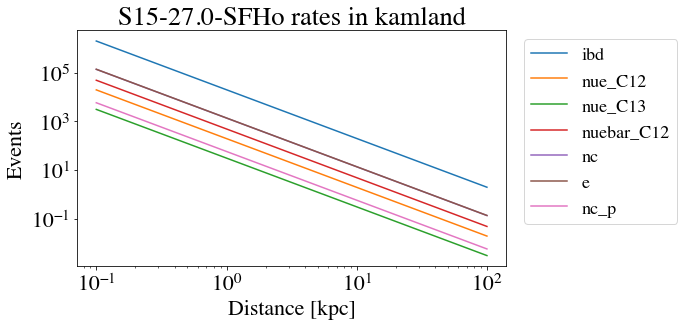

In [11]:
beer.plot_distance_rates(sn, detector)

## 500 ms time series

In [12]:
t_bins = 20
t_start = 0.0
t_end = 0.5
sn2 = Supernova(model, progenitor, transformation, distance, t_bins, t_start, t_end)

/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



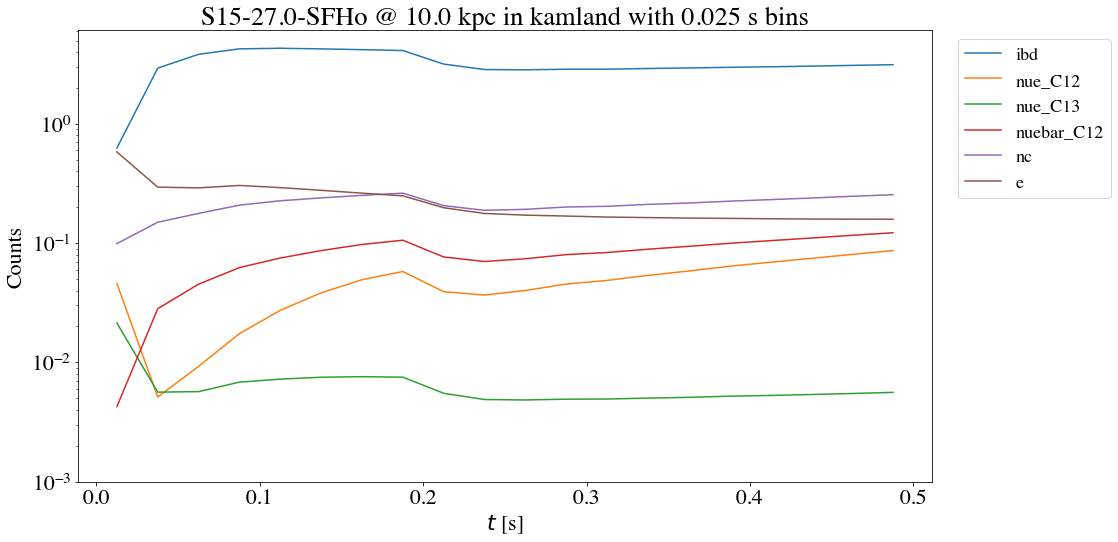

In [13]:
counts = pnut.time_events(sn2, detector)
beer.plot_series(sn2, detector)

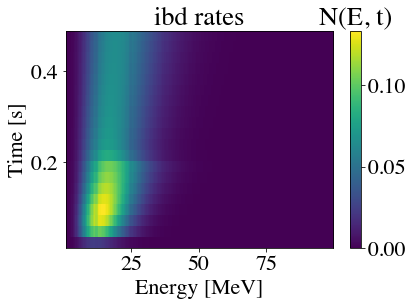

In [14]:
beer.plot_N_chan(sn2, detector, 'ibd')

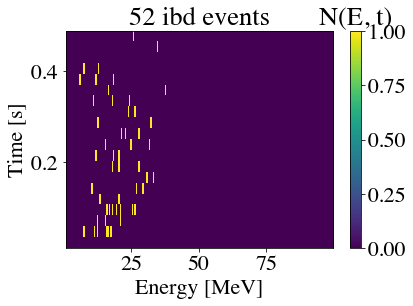

In [15]:
beer.plot_N_chan(sn2, detector, 'ibd', events=True, save=False)

## 500 ms totals

Single bin simulation to compare rates with random event generator.

In [16]:
sn3 = Supernova(model, progenitor, transformation, distance, 1, t_start, t_end)
snow = pnut.snowglobes_events(sn3, detector)
nc = pnut.sspike_events(sn3, detector)
tots = pnut.event_totals(sn3, detector)
vis = pnut.vis_totals(sn3, detector)
vis

/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



,model,mass,eos,channel,events
0,Sukhbold_2015,27.0,SFHo,ibd,64.246361
1,Sukhbold_2015,27.0,SFHo,nue_C12,0.946049
2,Sukhbold_2015,27.0,SFHo,nue_C13,0.131292
3,Sukhbold_2015,27.0,SFHo,nuebar_C12,1.623732
4,Sukhbold_2015,27.0,SFHo,nc,4.227453
5,Sukhbold_2015,27.0,SFHo,e,4.554052
6,Sukhbold_2015,27.0,SFHo,nc_p,0.220718


## 500 ms events by distance

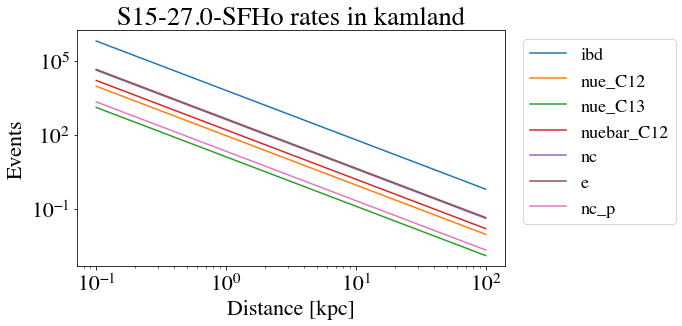

In [17]:
beer.plot_distance_rates(sn3, detector)